In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [3]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

In [4]:
df1=df.loc[df['POSTSEASON'].str.contains('E8|S16|F4',na=False)]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [5]:
df1['POSTSEASON'].value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

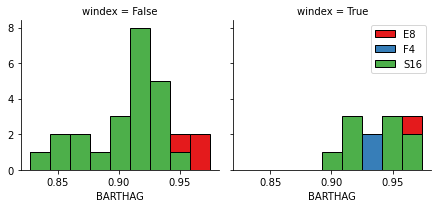

In [6]:
bins=np.linspace(df1.BARTHAG.min(),df1.BARTHAG.max(),10)
g=sns.FacetGrid(df1,col='windex',hue='POSTSEASON',palette='Set1',col_wrap=6)
g.map(plt.hist,'BARTHAG',bins=bins,ec='k')
g.axes[1].legend()
plt.show()

In [7]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

In [8]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

C:\Users\Avenger\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


In [9]:
X= df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


In [10]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [11]:
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

In [12]:
from sklearn.model_selection import train_test_split as tts
x_train,x_val,y_train,y_val=tts(X,y,test_size=0.2,random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Validation set:', x_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)



# Using K-Nearest Neighbors algorithm to predict the Winning team


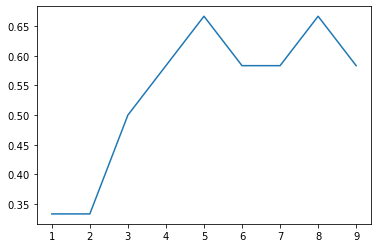

In [13]:
#to select best k value
from sklearn.neighbors import KNeighborsClassifier as KNC
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))
for n in range(1,ks):
    neigh=KNC(n_neighbors=n).fit(x_train,y_train)
    yhat=neigh.predict(x_val)
    mean_acc[n-1]=metrics.accuracy_score(y_val,yhat)
mean_acc

plt.plot(range(1,ks),mean_acc)
plt.show()

In [14]:
k=5
neigh=KNC(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier()

In [15]:
yhat=neigh.predict(x_val)
yhat[0:5]

array(['S16', 'S16', 'S16', 'E8', 'E8'], dtype=object)

In [16]:
print("Train Accuracy",metrics.accuracy_score(y_train,neigh.predict(x_train)))
print("Test Accuracy",metrics.accuracy_score(y_val,yhat))

Train Accuracy 0.6363636363636364
Test Accuracy 0.6666666666666666


# Using Decision Tree algorithm to predict the Winning team

In [17]:
from sklearn.tree import DecisionTreeClassifier as DTC
wintree=DTC(criterion="entropy",max_depth=2)
wintree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [18]:
yhat1=wintree.predict(x_val)
yhat1[0:5]

array(['S16', 'S16', 'S16', 'S16', 'S16'], dtype=object)

In [19]:
print("Test accuracy: ",metrics.accuracy_score(y_val,yhat1))

Test accuracy:  0.6666666666666666


# Using Logistic Regression algorithm to predict the Winning team

In [20]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
lr

LogisticRegression(C=0.01, solver='liblinear')

In [21]:
yhat2=lr.predict(x_val)
yhat_prob=lr.predict_proba(x_val)
print(yhat2)
print(yhat_prob)

['F4' 'S16' 'E8' 'E8' 'E8' 'E8' 'S16' 'F4' 'E8' 'S16' 'S16' 'S16']
[[0.31220273 0.3562491  0.33154818]
 [0.32510152 0.32839869 0.34649979]
 [0.36167465 0.30610437 0.33222097]
 [0.38701793 0.35317957 0.2598025 ]
 [0.35426016 0.32763412 0.31810573]
 [0.34432475 0.31699257 0.33868268]
 [0.32217474 0.33545881 0.34236644]
 [0.32767214 0.34639684 0.32593102]
 [0.34880289 0.31865572 0.33254139]
 [0.32108525 0.30666601 0.37224874]
 [0.34287302 0.30377031 0.35335668]
 [0.33284243 0.29291228 0.3742453 ]]


In [22]:
#print('jaccard_score: ',metrics.jaccard_score(y_val,yhat2,pos_label=2))
print('log_loss: ',metrics.log_loss(y_val,yhat_prob))
print('f1_score: ',metrics.f1_score(y_val,yhat2,average='weighted'))

log_loss:  1.095461062326229
f1_score:  0.6245421245421245


# Using SVM algorithm to predict the Winning team

In [23]:
from sklearn import svm
clf=svm.SVC(kernel='sigmoid')
clf.fit(x_train,y_train)
yhat3=clf.predict(x_val)
yhat3

array(['S16', 'S16', 'S16', 'E8', 'E8', 'E8', 'S16', 'S16', 'S16', 'S16',
       'S16', 'S16'], dtype=object)

In [24]:
#print('jaccard_score: ',metrics.jaccard_score(y_val,yhat2,pos_label=2))
print('f1_score: ',metrics.f1_score(y_val,yhat3,average='weighted'))

f1_score:  0.5372549019607843
